In [5]:
pip install numpy pandas matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [8]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
data.shape
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
# Splitting company name from car name

company_name = data['CarName'].apply(lambda x : x.split(' ')[0])
# print(company_name)
data.insert(3, 'CompanyName', company_name)
data.drop(['CarName'], axis=1, inplace=True)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:

data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
# Fix invalid values

data.CompanyName = data.CompanyName.str.lower()

def replaceName(a,b):
    data.CompanyName.replace(a, b, inplace=True)

replaceName('alfa-romero', 'alfa-romeo')
replaceName('maxda', 'mazda')
replaceName('vokswagen', 'volkswagen')
replaceName('vw', 'volkswagen')
replaceName('toyouta', 'toyota')
replaceName('porcshce', 'porsche')







/tmp/ipykernel_36586/2406054587.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.CompanyName.replace(a, b, inplace=True)


In [14]:
data.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [15]:
# Check for duplicates

# data.duplicated()
data.loc[data.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


# Data visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

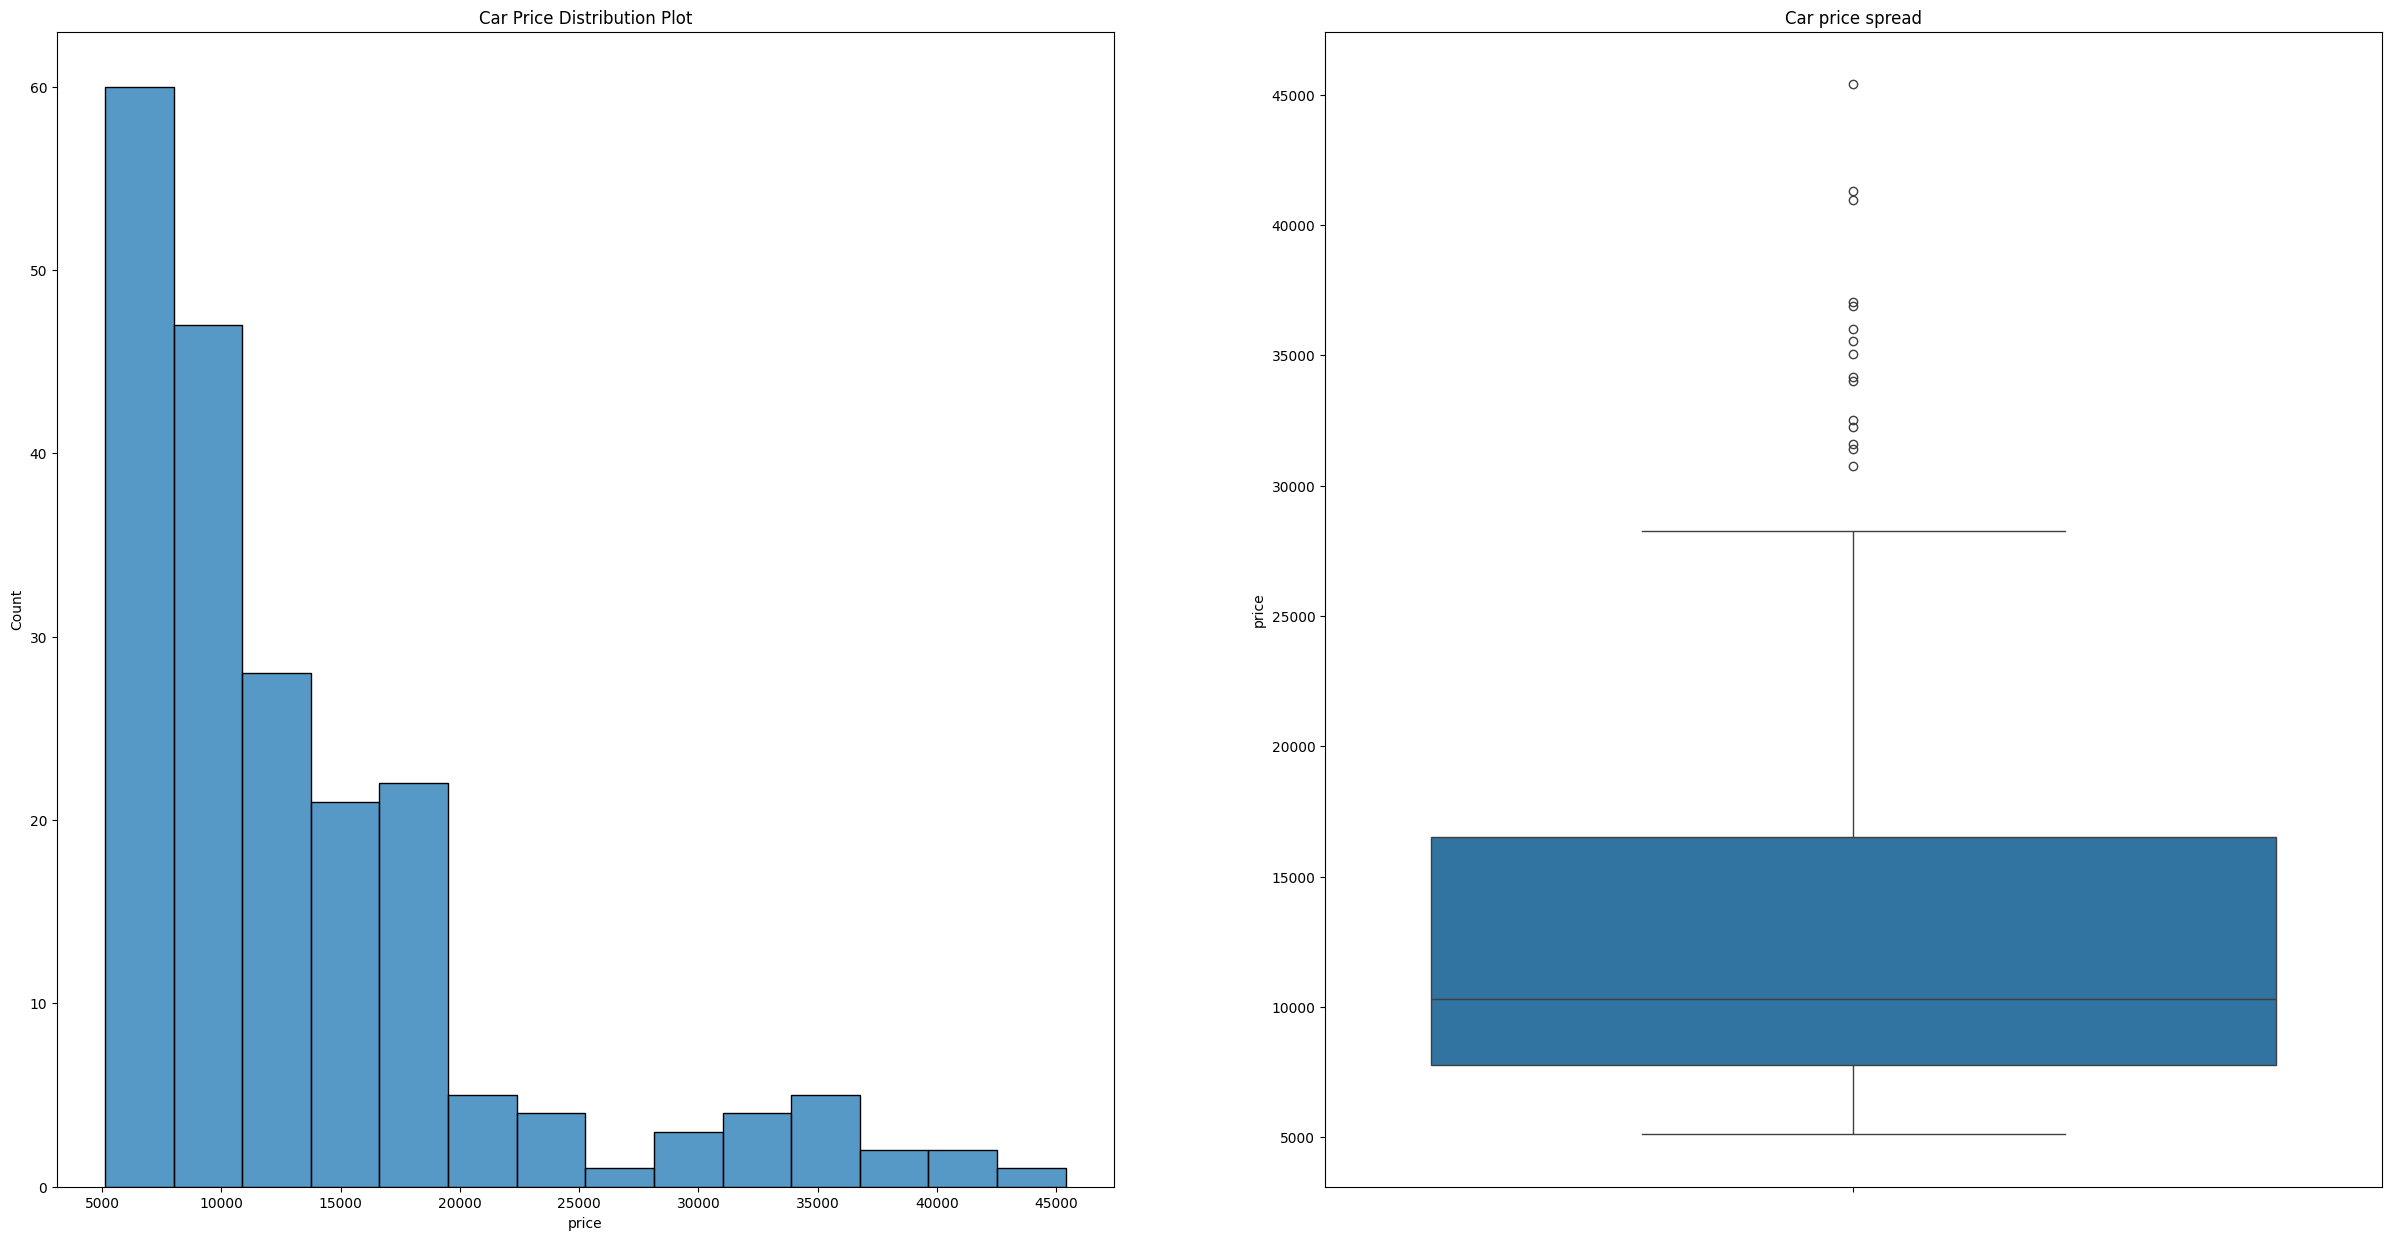

In [16]:
# Distributions

plt.figure(figsize=(30, 15))

plt.subplot(1, 2, 1)

plt.title('Car Price Distribution Plot')

sns.histplot(data.price)

plt.subplot(1, 2, 2)

plt.title('Car price spread')

sns.boxplot(y=data.price)

plt.show


In [17]:
data.price.describe(percentiles = (0.25, 0.5, 0.75, 0.85, 0.90, 1))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

## Observations

1. Most of the cars purchased falls between 10000 and 150000
2. Theres a significant gap between the mean and median of prices. Mean is 13276 and median is 10295. The difference is because the price distribution is skewed.

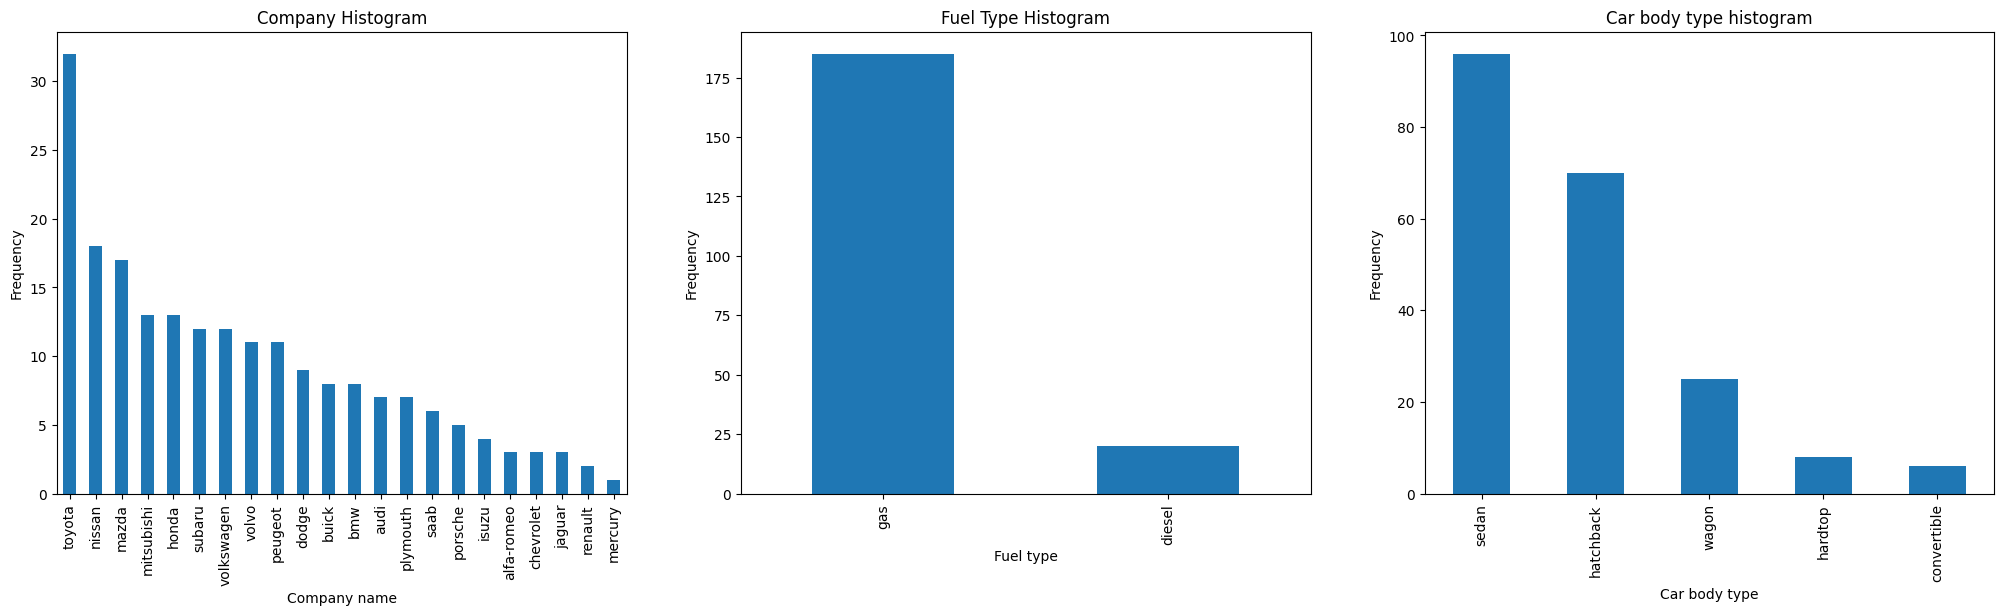

In [18]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 1)

plt1 = data.CompanyName.value_counts().plot(kind='bar')

plt.title('Company Histogram')

plt1.set(xlabel='Company name', ylabel='Frequency')


plt.subplot(1, 3, 2)

plt1 = data.fueltype.value_counts().plot(kind='bar')

plt.title('Fuel Type Histogram')

plt1.set(xlabel='Fuel type', ylabel='Frequency')

plt.subplot(1, 3, 3)

plt1 = data.carbody.value_counts().plot(kind='bar')

plt.title('Car body type histogram')

plt1.set(xlabel='Car body type', ylabel='Frequency')

plt.show()


# print(type(data))

# frame = pd.DataFrame(data.CompanyName)
# plt.figure(figsize=(25, 8))

# plt.subplot(1, 1, 1)
# plt.title('Company Histogram')

# sns.countplot(x='CompanyName', data=frame)

# plt.xlabel('Company Name')

# plt.ylabel('Frequency')

# plt.show()


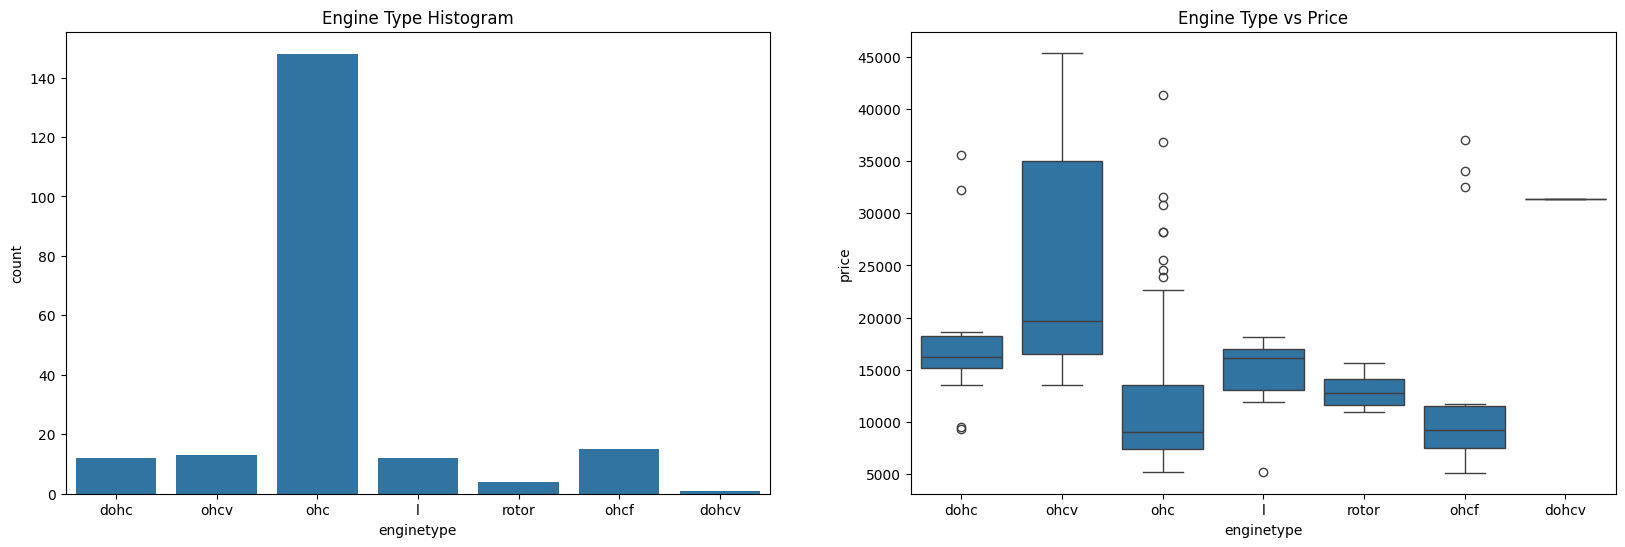

In [19]:
# data.enginetype.unique()
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Engine Type Histogram')

sns.countplot(x=data.enginetype)

# sns.barplot(x=data.enginetype, y=data.price)
plt.subplot(1, 2, 2)

plt.title('Engine Type vs Price')

sns.boxplot(x=data.enginetype, y=data.price)



plt.show()

Text(0.5, 1.0, 'Company name vs Price')

<Figure size 1000x800 with 0 Axes>

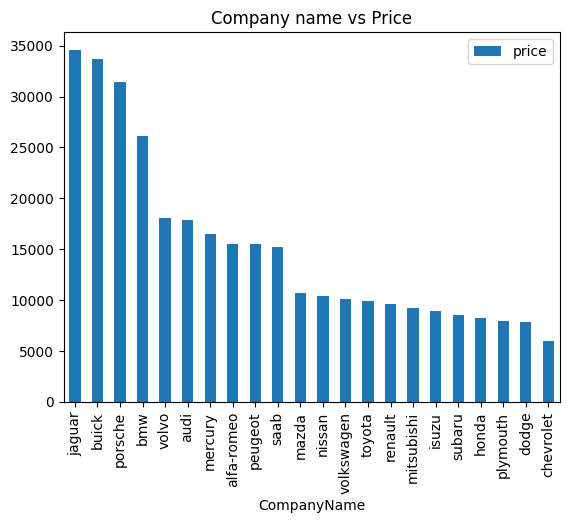

In [20]:
plt.figure(figsize=(10, 8))

df = pd.DataFrame(data.groupby(['CompanyName'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Company name vs Price')



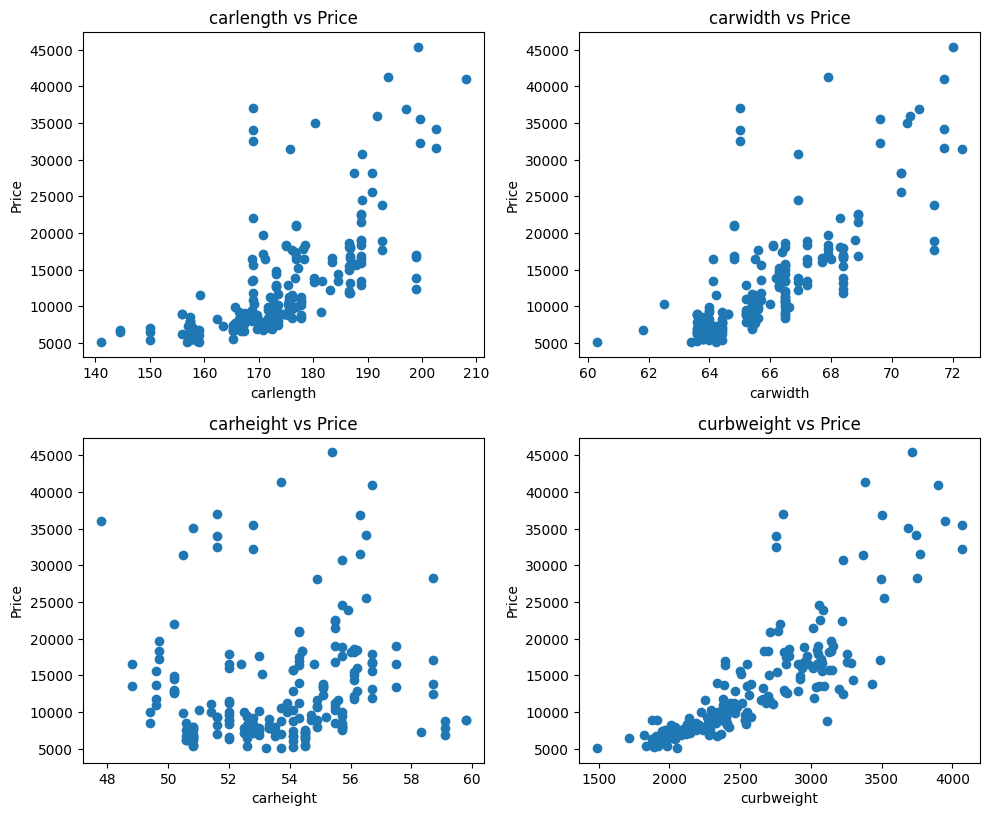

In [21]:
def scatter(x, fig):
    plt.subplot(5, 2, fig)
    plt.scatter(data[x], data['price'])
    plt.title(f'{x} vs Price')
    plt.xlabel(x)
    plt.ylabel('Price')

plt.figure(figsize=(10, 20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)


plt.tight_layout()
    

## Feature Engineering

In [22]:
# New field - fuel economy

data['fueleconomy'] = (0.55 * data['citympg']) + (0.45 * data['highwaympg'])

data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80


In [23]:
# Binning car companies based on avg price of each company

data['price'] = data['price'].astype('int')

temp = data.copy()

table = temp.groupby(['CompanyName'])['price'].mean() # table is a pandas Series

temp = temp.merge(table.reset_index(), how='left', on='CompanyName') #reset_index() converts the Series table into a DataFrame and resets the index. This makes CompanyName a column again instead of the index. 

bins = [0, 10000, 20000, 40000]
cars_bin = ['Budget', 'Medium', 'Highend']

data['carsrange'] = pd.cut(temp['price_y'], bins, right=False, labels=cars_bin)

data.head()

# print(table)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


### Bivariate Data Analysis

#### Relation b/w price and fuel economy

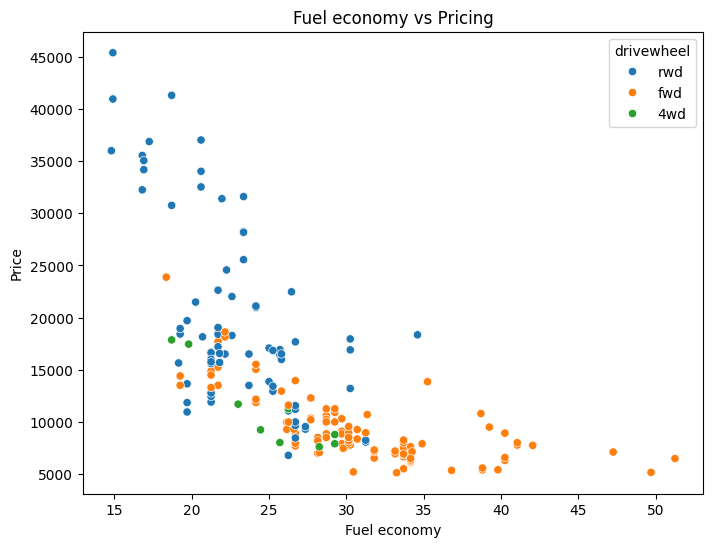

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(8, 6))

plt.title('Fuel economy vs Pricing')

sns.scatterplot(x=data['fueleconomy'], y=data['price'], hue=data['drivewheel'])

plt.xlabel('Fuel economy')

plt.ylabel('Price')

plt.show()
plt.tight_layout()

### List of significant variables after visual analysis

- Car range
- Engine type
- fuel type
- car body
- aspiration
- cylinder number
- drivewheel
- curbweight
- car length
- car width
- engine size
- boreratio
- horse power
- wheel base
- fuel economy

In [25]:
data_lr = data[['price', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'carsrange']]

data_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


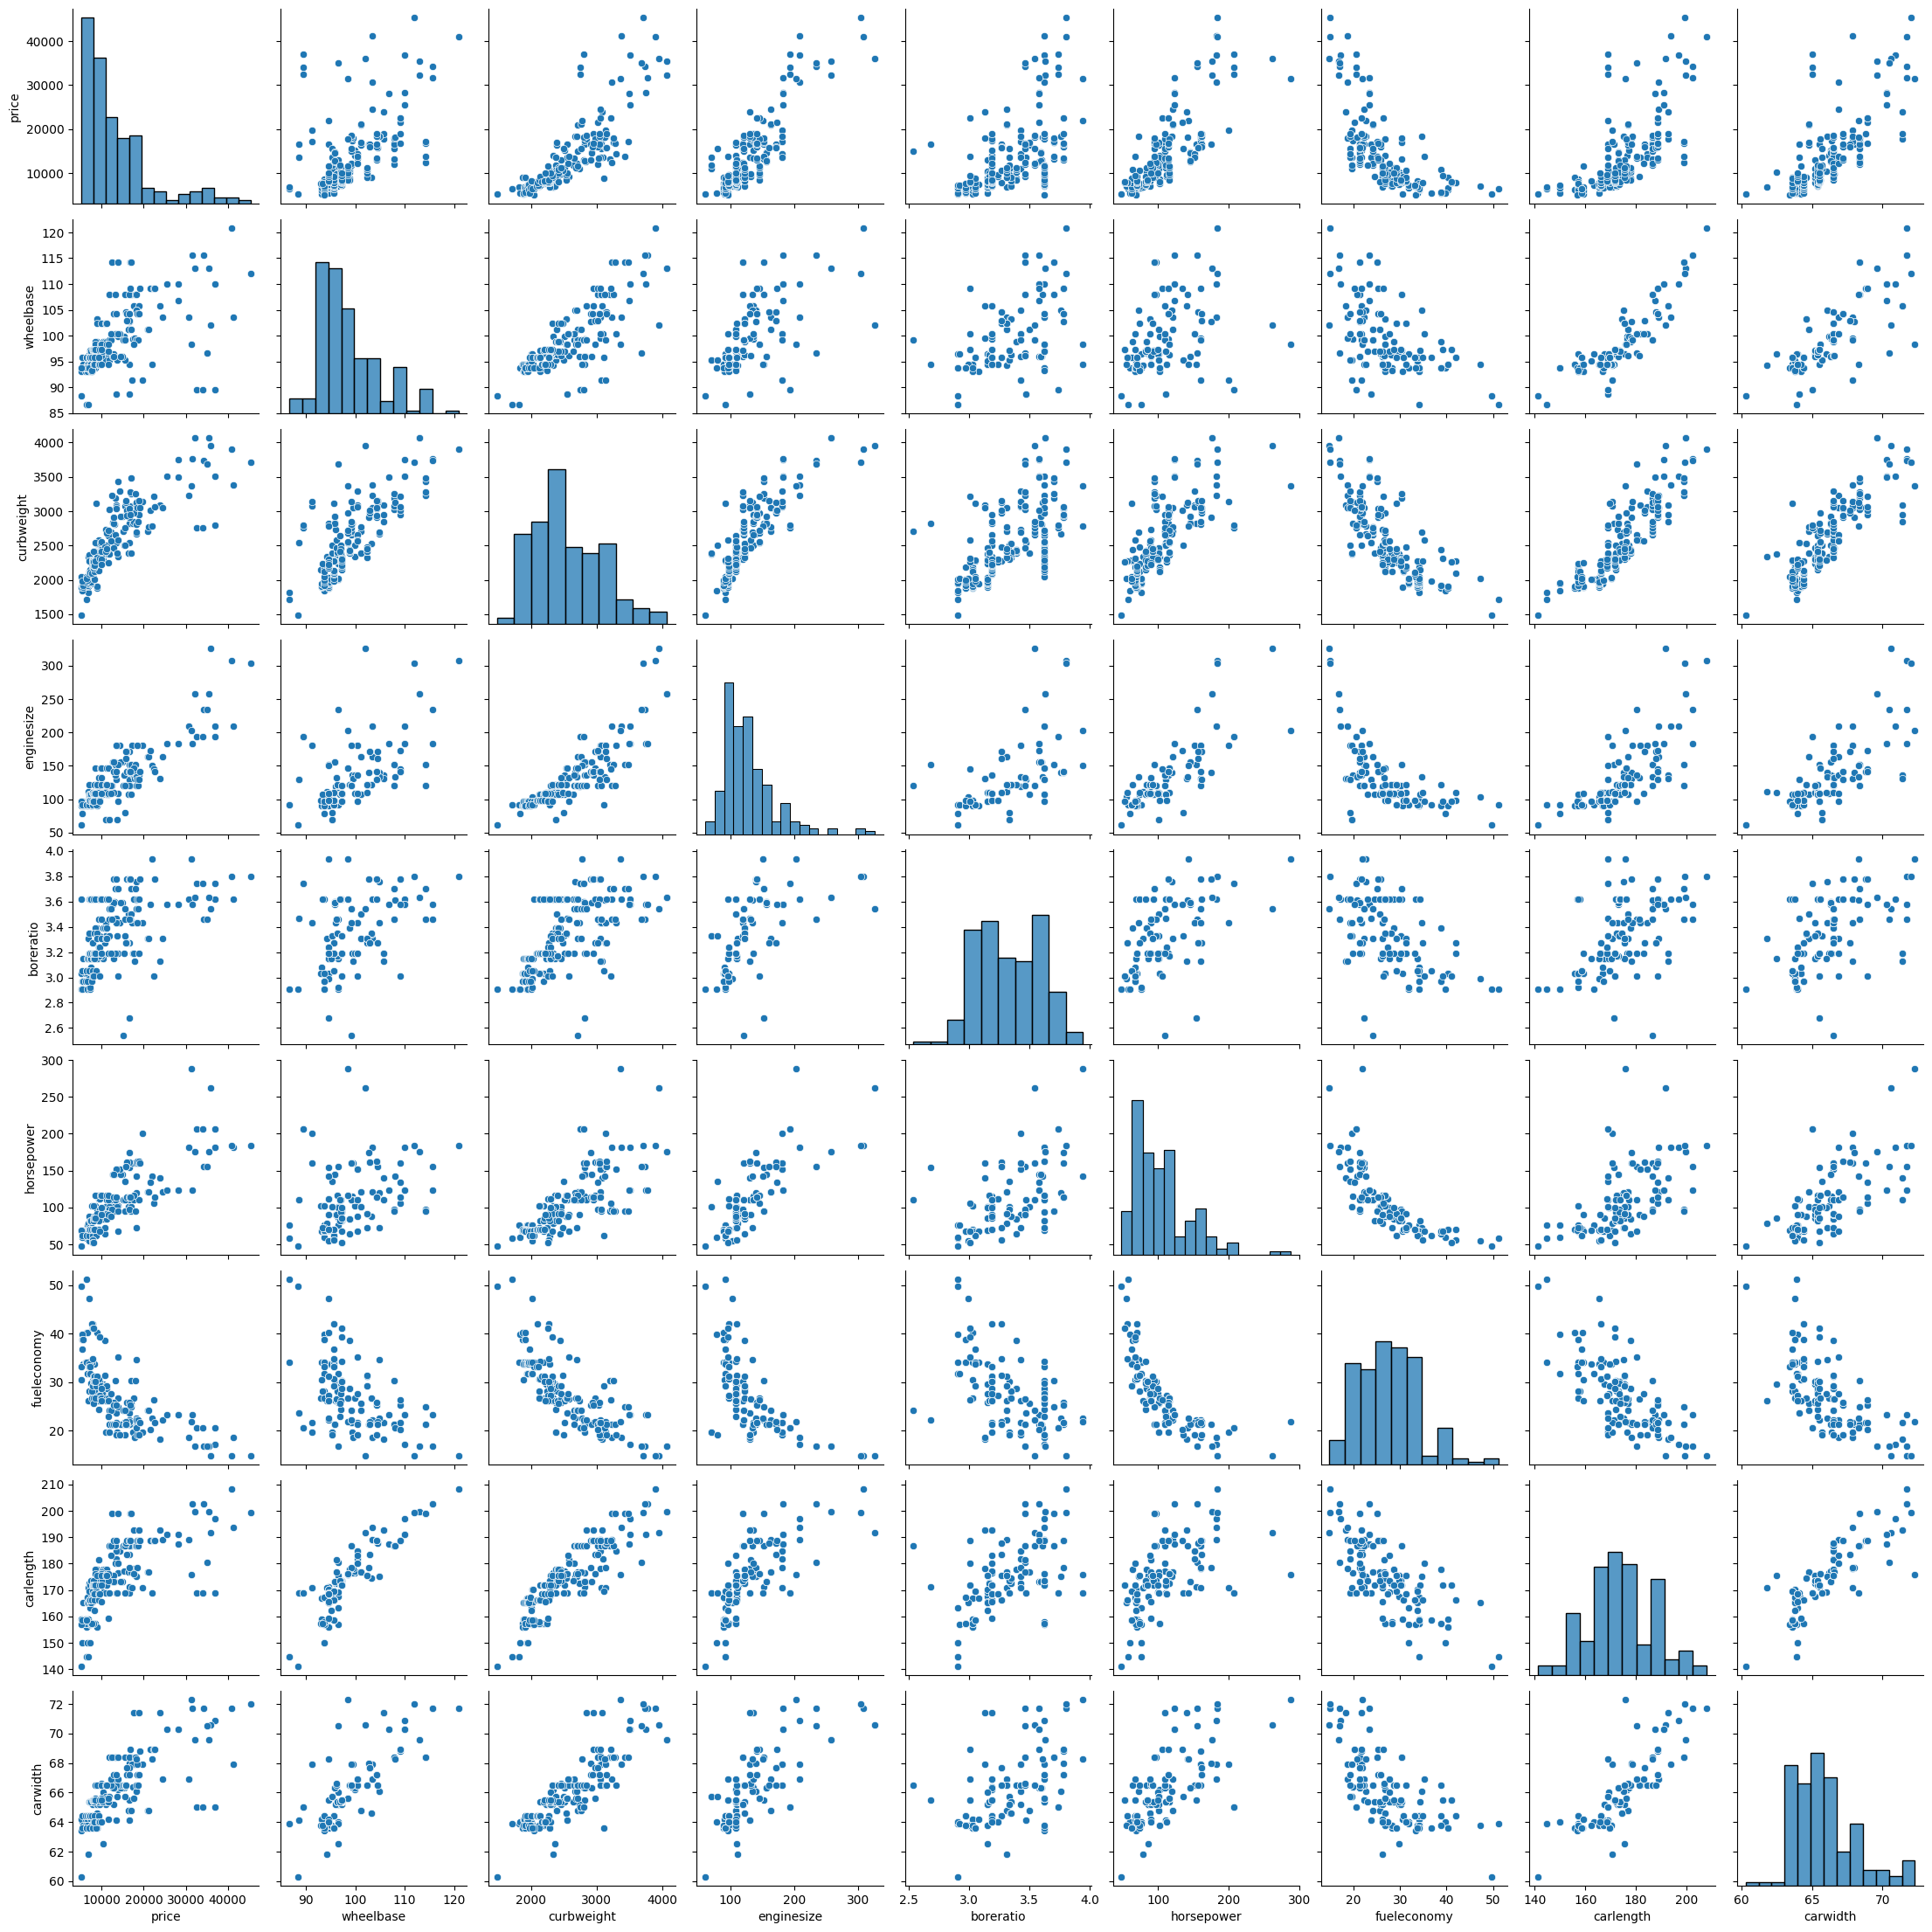

In [26]:
sns.pairplot(data_lr)
plt.show()

### Find high correlation b/w features

In [27]:
corr = data.select_dtypes(include=[np.number]).corr()

# print(corr)
corr
# data['symboling'].unique()

# data['CompanyName'].unique()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,0.013872
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.003257
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.508136
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682921,-0.691472
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.663419
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119337,-0.076356
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.781535
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.669464
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553174,-0.589898
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.043281


In [28]:
# Find out fields with hight correlation
corr_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            col1 = corr.columns[i]
            col2 = corr.columns[j]
            print(abs(corr.iloc[i, j]), "----", i, "----", j, "----", col1, "----", col2)
            corr_features.add(col1)
            corr_features.add(col2)


0.874587475964264 ---- 3 ---- 2 ---- carlength ---- wheelbase
0.8411182684818453 ---- 4 ---- 3 ---- carwidth ---- carlength
0.8777284608306433 ---- 6 ---- 3 ---- curbweight ---- carlength
0.8670324646791233 ---- 6 ---- 4 ---- curbweight ---- carwidth
0.850594073426277 ---- 7 ---- 6 ---- enginesize ---- curbweight
0.8097686545377302 ---- 11 ---- 7 ---- horsepower ---- enginesize
0.8014561756662708 ---- 13 ---- 11 ---- citympg ---- horsepower
0.9713370423425045 ---- 14 ---- 13 ---- highwaympg ---- citympg
0.835305437204371 ---- 15 ---- 6 ---- price ---- curbweight
0.8741451426986426 ---- 15 ---- 7 ---- price ---- enginesize
0.8081381197889799 ---- 15 ---- 11 ---- price ---- horsepower
0.9938444201653043 ---- 16 ---- 13 ---- fueleconomy ---- citympg
0.9916921560568324 ---- 16 ---- 14 ---- fueleconomy ---- highwaympg


In [29]:
print(corr.columns)
print("=========================")
print(corr_features)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy'],
      dtype='object')
{'carwidth', 'carlength', 'highwaympg', 'horsepower', 'enginesize', 'fueleconomy', 'curbweight', 'wheelbase', 'citympg', 'price'}


In [30]:
print(corr['highwaympg']['citympg'])

0.9713370423425045


In [31]:
# print correlation of highly correlated values

corr_high = data[list(corr_features)].corr()
corr_high

,carwidth,carlength,highwaympg,horsepower,enginesize,fueleconomy,curbweight,wheelbase,citympg,price
carwidth,1.000000,0.841118,-0.677218,0.640732,0.735433,-0.663419,0.867032,0.795144,-0.642704,0.759325
carlength,0.841118,1.000000,-0.704662,0.552623,0.683360,-0.691472,0.877728,0.874587,-0.670909,0.682921
highwaympg,-0.677218,-0.704662,1.000000,-0.770544,-0.677470,0.991692,-0.797465,-0.544082,0.971337,-0.697600
horsepower,0.640732,0.552623,-0.770544,1.000000,0.809769,-0.792822,0.750739,0.353294,-0.801456,0.808138
enginesize,0.735433,0.683360,-0.677470,0.809769,1.000000,-0.669464,0.850594,0.569329,-0.653658,0.874145
fueleconomy,-0.663419,-0.691472,0.991692,-0.792822,-0.669464,1.000000,-0.781535,-0.508136,0.993844,-0.696214
curbweight,0.867032,0.877728,-0.797465,0.750739,0.850594,-0.781535,1.000000,0.776386,-0.757414,0.835305
wheelbase,0.795144,0.874587,-0.544082,0.353294,0.569329,-0.508136,0.776386,1.000000,-0.470414,0.577816
citympg,-0.642704,-0.670909,0.971337,-0.801456,-0.653658,0.993844,-0.757414,-0.470414,1.000000,-0.685752
price,0.759325,0.682921,-0.697600,0.808138,0.874145,-0.696214,0.835305,0.577816,-0.685752,1.000000


<Axes: >

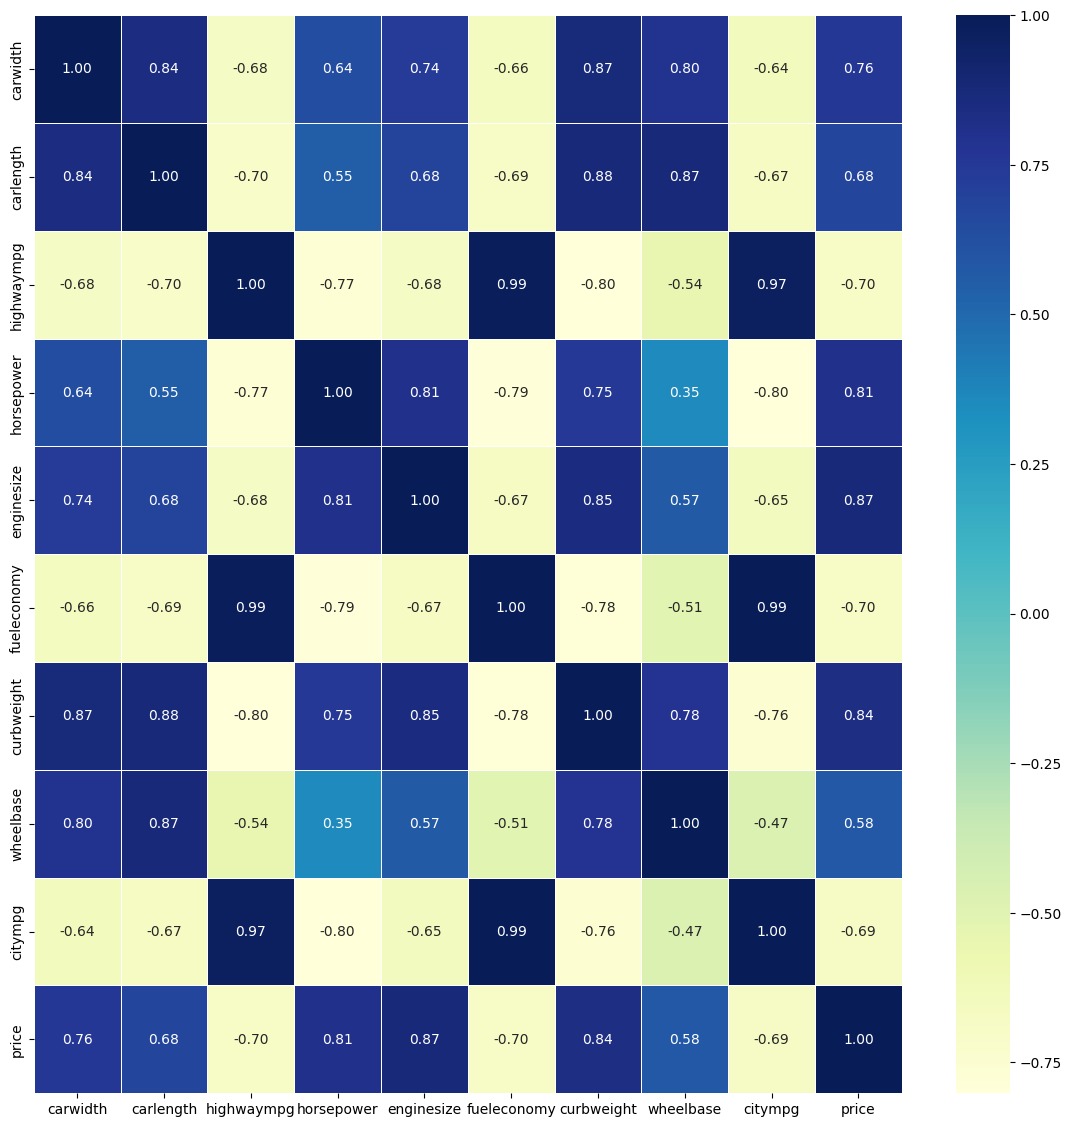

In [32]:
plt.figure(figsize=(14, 14))
sns.heatmap(corr_high, annot = True, linewidths=0.5, fmt="0.2f", cmap="YlGnBu")

### Create dummy variables for ordinal variables

In [33]:
# print(data['fueltype'].unique())
data['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [34]:
data_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [35]:
def dummies(feature, df):
    temp = pd.get_dummies(df[feature], drop_first=True, dtype="uint8")
    df = pd.concat([df, temp], axis=1)
    df.drop([feature], axis=1, inplace=True)
    return df

data_lr = data

data_lr = dummies('fueltype', data_lr)
data_lr = dummies('aspiration', data_lr)
data_lr = dummies('carbody', data_lr)
data_lr = dummies('drivewheel', data_lr)
data_lr = dummies('enginetype', data_lr)
data_lr = dummies('cylindernumber', data_lr)
data_lr = dummies('carsrange', data_lr)
data_lr = dummies('CompanyName', data_lr)
data_lr = dummies('doornumber', data_lr)
data_lr = dummies('enginelocation', data_lr)
data_lr = dummies('fuelsystem', data_lr)






In [36]:
data_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    int64  
 16  fueleconomy       205 non-null    float64
 1

## Train-Test Split and Feature Scaling

In [37]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data_lr, train_size=0.7, test_size=0.3, random_state=100)

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_vars = ['wheelbase', 'carheight', 'stroke', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'fueleconomy', 'carlength', 'carwidth']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
df_train.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,volvo,two,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,123,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,...,0,0,0,1,0,0,0,0,0,0
125,126,3,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,...,0,1,0,0,0,0,0,1,0,0
166,167,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,...,0,1,0,0,0,0,0,1,0,0
1,2,3,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,...,0,1,0,0,0,0,0,1,0,0
199,200,-1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,...,1,0,0,0,0,0,0,1,0,0
